Butterworth Filter

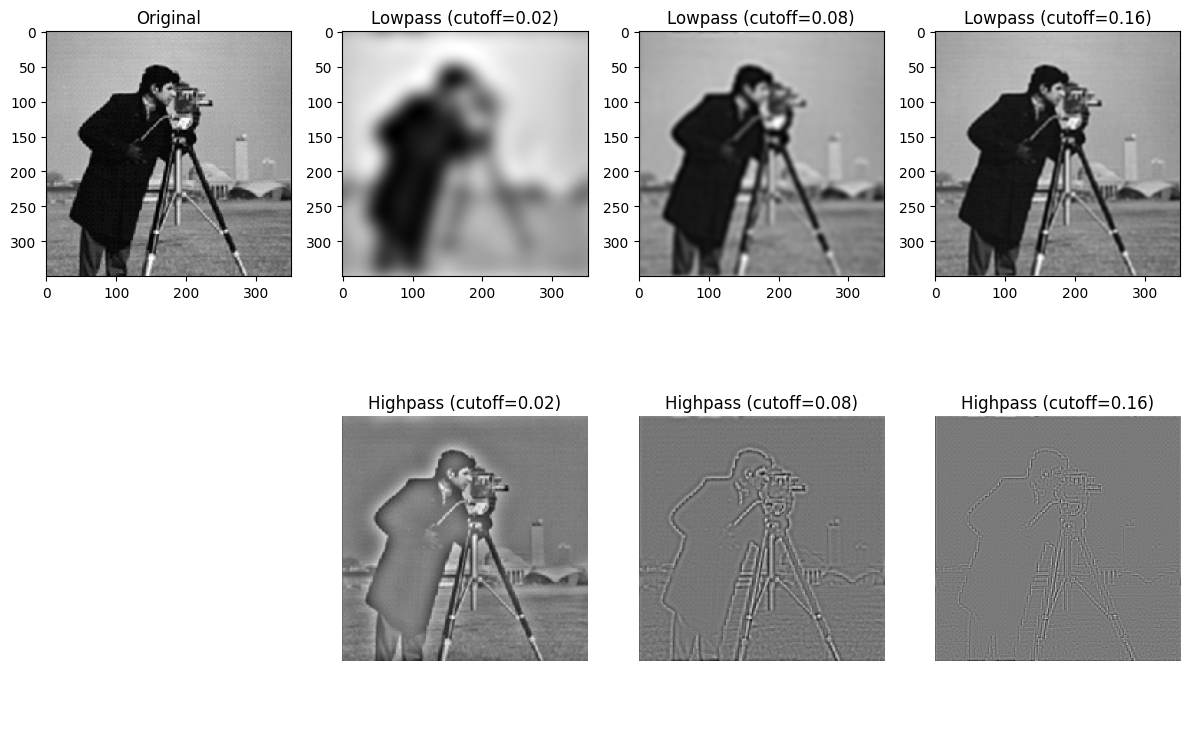

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, filters
from scipy.fft import fftfreq, fftshift


def butterworth_filter(image, cutoff_frequency_ratio, order=3):
    """Apply Butterworth filter to the image.

    Parameters
    ----------
    image : ndarray
        The image to be filtered.
    cutoff_frequency_ratio : float
        Cutoff frequency as a fraction of the maximum frequency.
    order : float, optional
        The order of the Butterworth filter.

    Returns
    -------
    filtered_image : ndarray
        Image after applying the Butterworth filter.
    """
    # Compute the Fourier transform of the image
    image_fft = np.fft.fft2(image)
    
    # Create Butterworth filter kernel
    rows, cols = image.shape
    u = fftfreq(cols)
    v = fftfreq(rows)
    U, V = np.meshgrid(u, v)
    D = np.sqrt(U**2 + V**2)
    H = 1 / (1 + (D / cutoff_frequency_ratio)**(2 * order))
    
    # Apply the filter to the Fourier transform of the image
    filtered_image_fft = image_fft * H
    
    # Compute the inverse Fourier transform to get the filtered image
    filtered_image = np.fft.ifft2(filtered_image_fft).real
    
    return filtered_image


# Load the image using skimage.io.imread()
image = io.imread('cameraman.png', as_gray=True)

# cutoff frequencies as a fraction of the maximum frequency
cutoffs = [0.02, 0.08, 0.16]

# Perform filtering with the Butterworth filter at a range of cutoffs.
lowpass_filtered = []
highpass_filtered = []

for cutoff in cutoffs:
    lowpass_filtered.append(butterworth_filter(image, cutoff))
    highpass_filtered.append(image - lowpass_filtered[-1])

# Plot the filtered images
fig, axes = plt.subplots(2, len(cutoffs) + 1, figsize=(12, 8))
axes[0, 0].imshow(image, cmap='gray')
axes[0, 0].set_title('Original')
axes[1, 0].axis('off')
for i, cutoff in enumerate(cutoffs):
    axes[0, i + 1].imshow(lowpass_filtered[i], cmap='gray')
    axes[0, i + 1].set_title(f'Lowpass (cutoff={cutoff})')
    axes[1, i + 1].imshow(highpass_filtered[i], cmap='gray')
    axes[1, i + 1].set_title(f'Highpass (cutoff={cutoff})')
    axes[1, i + 1].axis('off')
plt.tight_layout()
plt.show()


Ideal Filter

In [7]:
import skimage

ModuleNotFoundError: No module named 'skimage'

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, img_as_float
from scipy.fft import fft2, ifft2, fftshift

def ideal_lowpass_filter(shape, cutoff_frequency):
    """Generate an ideal lowpass filter.

    Parameters
    ----------
    shape : tuple
        Shape of the filter.
    cutoff_frequency : float
        Cutoff frequency of the filter.

    Returns
    -------
    ndarray
        The ideal lowpass filter.
    """
    rows, cols = shape
    center_row, center_col = rows // 2, cols // 2
    filter = np.zeros((rows, cols))
    for i in range(rows):
        for j in range(cols):
            distance = np.sqrt((i - center_row) ** 2 + (j - center_col) ** 2)
            if distance <= cutoff_frequency:
                filter[i, j] = 1
    return filter

# Load the image
image = io.imread('cameraman.png')
image = color.rgba2rgb(image)  # Convert RGBA to RGB
image = color.rgb2gray(image)
image = img_as_float(image)

# Fourier transform
image_fft = fft2(image)
image_fft_shifted = fftshift(image_fft)

# Define the cutoff frequency
cutoff_frequency = 20  # Adjust this value as needed

# Create the ideal lowpass filter
filter_shape = image.shape
ideal_filter = ideal_lowpass_filter(filter_shape, cutoff_frequency)

# Apply the filter in the frequency domain
filtered_image_fft_shifted = image_fft_shifted * ideal_filter

# Inverse Fourier transform
filtered_image_fft = fftshift(filtered_image_fft_shifted)
filtered_image = np.real(ifft2(filtered_image_fft))

# Plot the original and filtered images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title('Ideal Filter Image')
plt.axis('off')

plt.show()


ModuleNotFoundError: No module named 'skimage'

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, img_as_float
from skimage import filters
from scipy.fft import fft2, ifft2, fftshift

def ideal_lowpass_filter(shape, cutoff_frequency):
    """Generate an ideal lowpass filter.

    Parameters
    ----------
    shape : tuple
        Shape of the filter.
    cutoff_frequency : float
        Cutoff frequency of the filter.

    Returns
    -------
    ndarray
        The ideal lowpass filter.
    """
    rows, cols = shape
    center_row, center_col = rows // 2, cols // 2
    filter = np.zeros((rows, cols))
    for i in range(rows):
        for j in range(cols):
            distance = np.sqrt((i - center_row) ** 2 + (j - center_col) ** 2)
            if distance <= cutoff_frequency:
                filter[i, j] = 1
    return filter

def butterworth_filter(image, cutoff_frequency, order=3):
    """Apply Butterworth filtering to the image.

    Parameters
    ----------
    image : ndarray
        The input image.
    cutoff_frequency : float
        The cutoff frequency of the filter.
    order : float, optional
        The order of the Butterworth filter.

    Returns
    -------
    ndarray
        The filtered image.
    """
    nyquist_frequency = 0.5  # Nyquist frequency is half the sampling frequency
    cutoff_frequency_ratio = cutoff_frequency / nyquist_frequency
    if cutoff_frequency_ratio > 0.5:
        raise ValueError("Cutoff frequency ratio should be in the range [0, 0.5].")
    
    return filters.butterworth(
        image,
        cutoff_frequency_ratio=cutoff_frequency_ratio,
        order=order,
        high_pass=False,
        squared_butterworth=True,
        npad=0
    )

# Load the image
image = io.imread('cameraman.png')
image = color.rgba2rgb(image)  # Convert RGBA to RGB
image_gray = color.rgb2gray(image)
image = img_as_float(image)

# Fourier transform
image_fft = fft2(image_gray)
image_fft_shifted = fftshift(image_fft)

# Define the cutoff frequency
cutoff_frequency = 0.2  # Adjust this value as needed

# Create the ideal lowpass filter
filter_shape = image_gray.shape
ideal_filter = ideal_lowpass_filter(filter_shape, cutoff_frequency)

# Apply the ideal lowpass filter in the frequency domain
filtered_image_fft_shifted_ideal = image_fft_shifted * ideal_filter

# Inverse Fourier transform for ideal filter
filtered_image_fft_ideal = fftshift(filtered_image_fft_shifted_ideal)
filtered_image_ideal = np.real(ifft2(filtered_image_fft_ideal))

# Apply Butterworth filtering
filtered_image_butterworth = butterworth_filter(image_gray, cutoff_frequency)

# Plot the original, ideal lowpass filter, and Butterworth filtered images
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.imshow(image_gray, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(filtered_image_ideal, cmap='gray')
plt.title('Ideal Lowpass Filtered Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(filtered_image_butterworth, cmap='gray')
plt.title('Butterworth Filtered Image')
plt.axis('off')

plt.show()


ModuleNotFoundError: No module named 'skimage'